# Importing MNIST data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d0=pd.read_csv("./train.csv")
# print(d0.head())
l=d0["label"]
d=d0.iloc[:,1:]
# print(d.head)

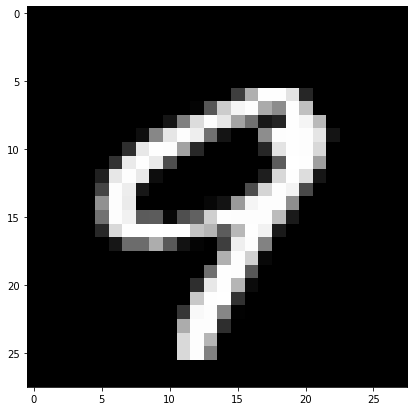

9


In [2]:
plt.figure(figsize=(7,7))
idx=100

grid_data=np.array(d.iloc[idx])
grid_data=grid_data.reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray") 
plt.show() 
print(l.iloc[idx])

In [3]:
#Pick first 15" " K dista-points to work on for time-effeciency. 
#Excercise: Perform the same analysis on all of 42" " K data-points. 
labels = l.head( 15000) 
data = d.head( 15000) 
print("the shape of sample data = ", data.shape)  

the shape of sample data =  (15000, 784)


In [4]:
# Data-preprocessing: Standardizing the data 
from sklearn.preprocessing import StandardScaler 
standardized_data = StandardScaler().fit_transform(data) 
print(standardized_data.shape)

(15000, 784)


In [5]:
sample_data=standardized_data
cov_mat=np.matmul(sample_data.T,sample_data)
print("the shape of sample data = ", cov_mat.shape)  

the shape of sample data =  (784, 784)


In [6]:
from scipy.linalg import eigh
#eigh gives eigenvalues in ascending order
#Let's just take top 2 i.e. 782,783 eigen values since indexing starts from 0
values,vectors=eigh(cov_mat,eigvals=(782,783))
print("the shape of eigen vectors = ", vectors.shape)  
#Converting the eigen vectors into (2,d) shape for easyness of further processing
vectors=vectors.T
print("updated shape of eigen vectors = ", vectors.shape)  


the shape of eigen vectors =  (784, 2)
updated shape of eigen vectors =  (2, 784)


# 1. PCA

# Principal Component Analysis using scipy

In [7]:
#projecting the sample data to the new plane
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors,sample_data.T)
print("resultant new data points shape", vectors.shape,"X",sample_data.T.shape,"=",new_coordinates.shape) 

resultant new data points shape (2, 784) X (784, 15000) = (2, 15000)


In [8]:
import pandas as pd 
# appending label to the 2d projected data 
new_coordinates = np.vstack((new_coordinates, labels)).T 
# creating a new data frame for ploting the labeled points. 
dataframe = pd. DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal","label")) 
print(dataframe. head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/Users/parveshkamboj/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


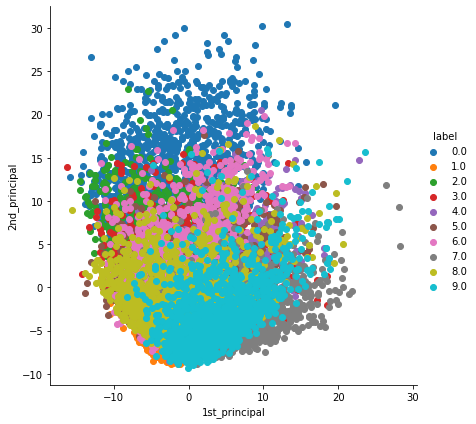

In [9]:
#ploting the 2d data points with seaborn 
import seaborn as sn 
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

# Principal Component Analysis using sklearn

In [10]:
from sklearn import decomposition 
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print("the shape of pca reduced data = ", pca_data.shape)  


the shape of pca reduced data =  (15000, 2)


/Users/parveshkamboj/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


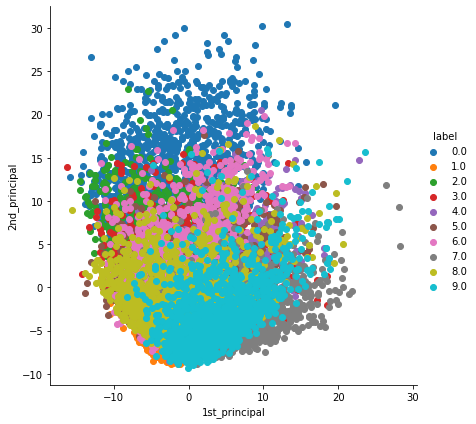

In [11]:
new_coordinates = np.vstack((pca_data.T, labels)).T 
import seaborn as sn 
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

# Variance Explained by Principal components 

Text(0.5, 1.0, 'Variance Explained by Components')

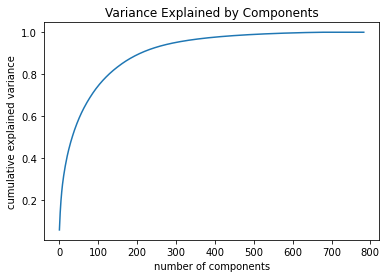

In [15]:
pca = decomposition.PCA().fit(sample_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Variance Explained by Components')

# 2. t-SNE 

/Users/parveshkamboj/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


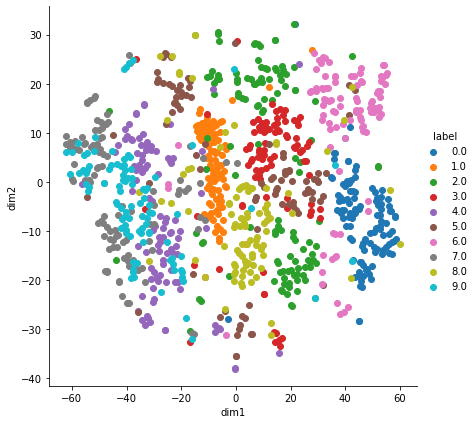

In [18]:
from sklearn.manifold import TSNE

#applying t-SNE only on 1000 data points as it takes very long time for data of large size
data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]

model=TSNE(n_components=2, random_state=0)
#default number of components = 2
#default number of iterations = 1000
#default learning rate = 200
#default perplexity = 30

tsne_data=model.fit_transform(data_1000)

tsne_data=np.vstack((tsne_data.T, labels_1000)).T 
tsne_df=pd.DataFrame(data=tsne_data,columns=['dim1','dim2','label'])

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'dim1','dim2').add_legend()
plt.show()
